Online resources: https://stackedit.io/app# , https://github.com/DataScienceUB/introduction-datascience-python-book , https://latex.codecogs.com/eqneditor/editor.php 

In [1]:
import pandas as pd # tratamiento de datos
import numpy as np
from scipy.stats import norm,gaussian_kde
import matplotlib.pyplot as plt 
import math

from IPython.core.display import display, HTML

/tmp/ipykernel_6423/1842690681.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# 4.1) Inferencia estadística

Hay dos tipos fundamentales de aproximaciones estadísticas: la **frecuentista** y la **Bayesiana**

- En el caso ***frecuentista*** hay una población que puede ser representada por varios parámetros, y de las que podemos obtener numerosos ejemplos aleatorios. Estos parámetros son fijos, pero el observador no puede acceder a ellos. Lo máximo que puede hacerse es obtener una muestra de la población, calcular los parámetros de la muestra y usar la inferencia estadística para hacer proposiciones probables respecto de la población.
- En el caso ***bayesiano*** nos basamos en parámetros fijos; esos parámetros describen el conjunto de los datos y nos centramos en calcular distribuciones que deberán concordar con las muestras posteriores. Calculamos información a priori.

***Por ahora, nos dedicaremos a la aproximación frecuentista.***

<hr>

### 4.2) Inferencia estadística: la aproximación frecuentista.

Como hemos dicho, se basa en parámetros calculados de la muestra de una población. Las proposiciones que podemos hacer son:

- Proposiciones sobre *Estimación puntual*: valor que mejor se aproxima a algún parámetro de interés, como la media o la mediana.
- Proposiciones sobre *Estimación de intervalos de confianza o set estimation*: rango de valores que mejor representa a algún parámtero de interés.
- Proposiciones sobre aceptar o rechazar **hipótesis**. 

En todas las proposiciones, podemos estimar la probabilidad de que el resultado haya sido causado por azar. La estadística clásica manejaba conceptos como el teorema del límite central, la distribución empírica de la muestra o el t-test.

El uso de modernos ordenadores abre la puerta a otros métodos: métodos de muestreo (como bootstrapping), Markov chain (la cadena de Markov), método de Monte Carlo... Con los que podemos manejar modelos más realistas.

### 4.3) Midiendo la variabilidad en estimaciones

Las estimaciones producidas por la estadística descriptiva ***no es la verdad***. Pero son mejores cuantos más datos estén disponibles. Así que tiene sentido usarlas como elementos centrales de nuestras proposiciones, y medir su variabilidad respecto al tamaño de la muestra. 

#### 4.3.1) Estimaciones puntuales

Ejemplo de la ciudad de Barcelona. Accidentes en 2013.


In [2]:
data = pd.read_csv("ACCIDENTS_GU_BCN_2013.csv",encoding="iso8859_15") # hay que cambiar el encoding a iso8859_15
data['Fecha']=data['Dia de mes'].apply(lambda x: str(x))+"-"+data['Mes de any'].apply(lambda x: str(x))+"-2013"
data['Fecha']=pd.to_datetime(data['Fecha'],dayfirst=True)
accidentes = data.groupby(data['Fecha']).size()
accidentes.head()

Fecha
2013-01-01    16
2013-01-02    18
2013-01-03    17
2013-01-04    29
2013-01-05    17
dtype: int64

In [3]:
display(HTML(("<p>La media de los accidentes en Barcelona en 2013 es: <b>{:.4f}</b></p>".format(accidentes.mean()))))

Vamos a suponer, por ahora, que tenemos *acceso limitado a los datos*, a una parte de ellos (la muestra). ¿Es posible dar una **aproximación de la media de la población**?

Lo primero que se nos ocurre es hacer la media de la muestra (**estimación puntual**) y suponer, en primera aproximación, que es nuestra mejor opción para estimar la media de la población. 

El problema está que esta estimación variará de una muestra a otra. Y esta variación nos sugiere que nuestra estimación estará cercana ***pero no será igual que nuestro parámetro de interés.***

En este caso, como tenemos acceso a la población podemos construir **la distribución muestral de la media de las muestras**. Es decir, dado un tamaño de la muestra dado, calculamos todas las posibles muestras de ese tamaño, y hacemos un histograma con sus medias. 

1) Construimos un número ***s***  de tests --> $\left \{ x^i \; \dots \dots \;  x^s \right \}$
2) Cada test ***j***  está compuesto de ***n*** elemento (tamaño de la muestra) -->  $x^j = \left \{ x_i^j \right \}_{i=1,\dots,n}$
3) Calculamos la media de cada test --> $\bar{\mu}^j = \frac{1}{n}\; \sum_{i=1}^{n} x_i^j$
4) Evaluamos el histograma de estas medias $\bar{\mu^j}$

In [4]:
df = accidentes.to_frame(name="numero") # convierte una serie en un data frame. Le pongo un nombre a la columna. 
s= 3000 # número de tests de ejemplo
n = 200 # tamaños de las muestras
medias = [0] * s # listado con todas las medias. Tiene 10000 entradas
for i in range(s): # por cada test
    rows = np.random.choice(df.index.values, n) # se elige, de un tamaño de 200, a 200 índices del dataframe al azar
    sampled_df = df.loc[rows]["numero"] # obtengo una simple lista de muestra
    # print(sampled_df)
    medias[i] = np.round(sampled_df.mean(),2) #calculo la media REDONDEADA A 2 y la guardo en una lista

<hr>

#### Dibujando el histograma de las medias

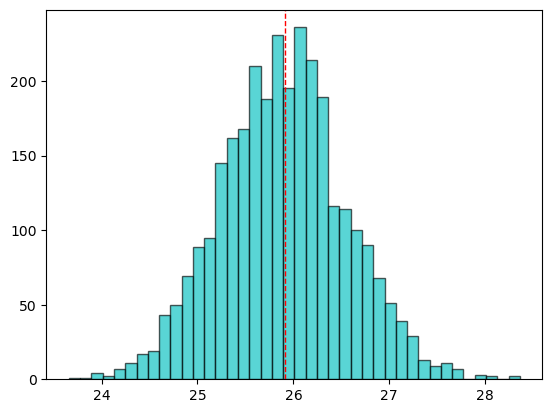

In [5]:
resultado = plt.hist(medias, bins=40, color='c', edgecolor='k', alpha=0.65) #dibujo el histograma de las medias con 40 intervalos
plt.axvline(x=accidentes.mean(),color='r',linestyle='dashed',linewidth=1) # añado la línea de la media de la población

<hr>

#### 4.3.1.2) La aproximación tradicional.

En un problema real no conocemos la población real. Así que no tendremos acceso completo a **la la distribución muestral de la media de las muestras**. Pero este problema puede ser resuelto haciendo uso de la estadística tradicional y de resultados teóricos. 

Dadas **n** observaciones independientes $\left \{ x_i  \right \}, i=1 \dots n$, de una población (una muestra), con desviación estándar $\sigma_x$, la desviación estándar de la media de la muestra, o ***error estándar*** sería

<center>$$ SE = \frac{\sigma_x}{\sqrt{n}}$$ </center>

La demostración de este resultado se basa en el **Teorema del Límite Central**, de Laplace (1810). Esta fórmula usa la desviación estándar  $\sigma_x$ de la población (que no es conocida). Pero se demuestra que si se usa la estimación **$\sigma_{\widehat{x}]$** de una muestra con n>30 y la distribución de la población no es asimétrica (oblicua) la aproximación es suficientemente buena. Esto no permite obtener el error estándar de la media de la muestra incluso sin acceder a la población. 

Así que... ¿Podemos dar una medida de la variabilidad de la media de la muestra? Sí, dando el error estándar de la distribución de las medias de forma empírica. 

In [6]:
rows = np.random.choice(df.index.values, n) #escojo una muestra al azar. n --> de antes
sampled_df = df.loc[rows]["numero"] # obtengo una simple lista de muestra
es_sampled_df = sampled_df.std()/ (math.sqrt(len(sampled_df))) # calculo el error estándar

print("El error estándar de una muestra aleatoria es: {:.3f}".format(es_sampled_df))
print("Calculamos el error estándar a partir de la desviación estándar de todas las medias de los {} tests {:.3f}".format(s,np.array(medias).std()))

El error estándar de una muestra aleatoria es: 0.681
Calculamos el error estándar a partir de la desviación estándar de todas las medias de los 3000 tests 0.653


<hr>

No se puede hacer con otro parámetro, como la mediana. Sólo con la media. 

#### 4.3.1.3) La aproximación computacional intensiva.

Consideremos una muestra de una hipotética población (lo más habitual). Lo más usual es el método bootstrapping: se trata de, a partir de una muestra, crear una muestra de reemplazo (o bootstrap) a la que podemos calcular la media. Repitiendo ésto una serie de veces, podemos obtener una distribución muestral de las medias. 

La idea básica radica en que con una sola muestra ya obtenemos una idea de la distribución de los datos de la población. Así que calculando nuevas muestras a partir de esta muestra, es como si lo hiciésemos de la población original. 

Con este método podemos estimar otros parámetros como la mediana, la moda, etc. No solo la media. 

In [7]:
def bootstrap(X,tests):
    x = [0] * tests
    for i in range(tests):
        sample=[X.iloc[j] for j in np.random.randint(len(X),size=len(X))] #coge al azar 365 valores de la población
        #, pero pueden estar repetidos con lo que son muestras diferentes ¿¿??
        x[i] = np.mean(sample) #le calcula la media a esa muestra
    return x

n = 300
m = bootstrap(df["numero"], n) # de antes he calculado el número de accidentes y lo he llamado n, que era 3000. df viene de convertir accidentes en un data frame df
print("La estimación de la media es {:.5f}".format(np.mean(m)))
    

La estimación de la media es 25.94534


### 4.3.2) Intervalos de confianza

Una estimación puntual $\theta$, como la media de la muestra, da un valor aceptable para un parámetro. Sin embargo, como hemos visto, no es perfecto. Siempre hay algún error en la estimación. Una medida de ese error es el cálculo del error estándar. 

En lugar de dar un simple valor, podemos dar un intervalo de valores para ese parámetro. Es lo que se conoce como ***intervalo de confianza***.

Para establecer el intervalo, consideramos dos ideas:

- El valor estimado puntual sigue siendo el valor más aceptable para el parámetro, y tiene sentido que el intervalo de confianza se construya a partir de este punto.
- La *plausibilidad* del intervalo debe deducirse de la distribución muestral de la estimación.

Para el caso de la media, el teorema límite central afirma que **la distribución de la muestra es normal**.

***Teorema 4.1:*** Dada una población con una media finita $\mu$ y una varianza no nula $\sigma^2$, la distribución muestral de la media se acerca a una distribución normal con una media de $\mu$ y una varianza de $\frac{\sigma^2}{n}$ mientras n, el tamaño de la muestra, aumente.

En este caso, y con la intención de definir un intervalo, podemos usar un conocido resultado de probabilidad que se aplica a distribuciones normales: **aproximadamente el 95% de las veces nuestra estimación estará dentro de 1.96 errores estándar de la verdadera media de la distribución**.

Si el intervalo se extiende 1.96 veces el error estándar de un punto estimado distribuido normalmente, intuitivamente podemos decir que tenemos una confianza del 95% de que hemos capturado el parámetro real. 

<center>$$ CI = [\; \theta - 1.96 \cdot SE \;,\; \theta + 1.96 \cdot SE\;] $$</center>


In [8]:
accidentes = df["numero"] #creo que lo estoy haciendo sobre la población total ¿¿?? 
mu = accidentes.mean()
error_estandar = accidentes.std()/math.sqrt(len(accidentes))
z = 1.96
ci = [mu-z*error_estandar,mu+z*error_estandar]
print("Intervalo de confianza CI: [ {:.3f}, {:.3f} ] // media {:.3f} y error {:.3f}".format(ci[0],ci[1],mu,error_estandar))

Intervalo de confianza CI: [ 24.975, 26.844 ] // media 25.910 y error 0.477


<hr>

Para una confianza del 99%, z=2.58 y para el 99.9%, z=3.291.

**NOTA:** recuerdo que en la carrera, frecuentemente escogíamos z=3. A veces, pocas, z=2

##### ¿Cómo se calcula un intervalo del 95% de confianza con bootstrap?

1. Repetir por un gran número de veces, **s**
    -  Dibujar **n** observaciones reemplazando los datos originales creando una re-muestra (o muestra bootstrap)
    -  Calcular la media de la muestra.
2. Calculamos la media del dato estadístico muestreado (media de las medias en este caso). Esto te da una estimación "bootstrapped" del dato estadístico muestreado.
3. Calculamos la desviación típica del dato estadístico muestreado. Esto da una estimación "bootstrapped" del error estándar.
4. Cogemos 1.96 más menos el intervalo. O bien del percentil 2.5 al 97.5 

In [12]:
m = bootstrap(accidentes,3000) # recuerdo que tenemos una función bootstrap que obtiene 10000 (s) medias de muestras de una población
# 10000 tarda algo de tiempo. Podemos poner un número menor como 3000 por motivos de ahorro de tiempo.
mu = np.mean(m)
error_estandar = np.std(m)

ci = [mu-z*error_estandar,mu+z*error_estandar] #lo puedo calcular así, como antes o...
ci = [np.percentile(m,2.5), np.percentile(m,97.5)]
print("Intervalo de confianza CI: [ {:.3f}, {:.3f} ] // media {:.3f} y error {:.3f}".format(ci[0],ci[1],mu,error_estandar))


Intervalo de confianza CI: [ 24.973, 26.838 ] // media 25.903 y error 0.480


<hr>

#### 4.3.2.1) ¿Qué significa una confianza del 95%?

El significado real de "confianza" no es evidente y debe se entendido desde el punto de vista del proceso de generación.

Si tomamos muchas (infinitas) muestras de una población y construimos un intervalo de confianza al 95% de cada muestra, entonces, en el 95% de esos intervalos debe contenerse el parámetro real. 

Luego cuando nos topamos con una muestra de la que calculo un intervalo de confianza del 95%, la interpretación correcta es que la verdadera media de la población estará dentro del intervalo de confianza el 95% de las veces. *No podemos decir que nuestra muestra específica contenga el parámetro verdadero que haya un 95% de probabilidades de que contenga el parámetro verdadero*. Esa interpretación no es correcta bajo la asunción de la estadística tradicional. 


